In [1]:
from keras.utils import set_random_seed
from keras import Sequential
from keras.layers import Conv2D

from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
set_random_seed(11)

In [76]:
from keras.models import load_model
x_train=np.load('x_train1.npy').reshape(-1,150,150,1)
x_test=np.load('x_test1.npy').reshape(-1,150,150,1)
x_val=np.load('x_val1.npy').reshape(-1,150,150,1)
y_train=np.load('y_train.npy')
y_test=np.load('y_test.npy')
y_val=np.load('y_val.npy')

In [77]:
def createModel(n_node):
    
    model=Sequential()
    
    # 입력
    model.add(Conv2D(n_node, kernel_size=3, padding='same', input_shape=(150,150,1)))
    
    
    model.add(Conv2D(50, kernel_size=3, padding='same'))
    
    
    # 출력
    model.add(Conv2D(1,kernel_size=3, padding='same', activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [78]:
# 메모리 에러남
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

modelr=createModel(50)
modelg=createModel(50)
modelb=createModel(50)


In [79]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 검증 데이터에 대한 loss값 2번 연속 개선되지 않으면 학습 중지
stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [80]:
modelr.fit(x_train/3, y_train[:,:,:,0], epochs=10, validation_data=(x_val/3, y_val[:,:,:,0]), callbacks=[stopCB])
modelg.fit(x_train/3, y_train[:,:,:,1], epochs=10, validation_data=(x_val/3, y_val[:,:,:,1]), callbacks=[stopCB])
modelb.fit(x_train/3, y_train[:,:,:,2], epochs=10, validation_data=(x_val/3, y_val[:,:,:,2]), callbacks=[stopCB])

Epoch 1/10
167/167 [==============================] - 338s 2s/step - loss: 0.0156 - val_loss: 0.1260
Epoch 2/10
167/167 [==============================] - 348s 2s/step - loss: 0.0069 - val_loss: 0.1173
Epoch 3/10
167/167 [==============================] - 355s 2s/step - loss: 0.0066 - val_loss: 0.1203
Epoch 4/10
167/167 [==============================] - 356s 2s/step - loss: 0.0065 - val_loss: 0.1240
Epoch 5/10
167/167 [==============================] - 349s 2s/step - loss: 0.0065 - val_loss: 0.1233
Epoch 1/10
167/167 [==============================] - 339s 2s/step - loss: 0.0099 - val_loss: 0.1241
Epoch 2/10
167/167 [==============================] - 332s 2s/step - loss: 0.0019 - val_loss: 0.1260
Epoch 3/10
167/167 [==============================] - 360s 2s/step - loss: 0.0017 - val_loss: 0.1271
Epoch 4/10
167/167 [==============================] - 354s 2s/step - loss: 0.0017 - val_loss: 0.1252
Epoch 1/10
167/167 [==============================] - 355s 2s/step - loss: 0.0256 - val_los

In [81]:
pre_out_r=modelr.predict(x_test[100]/3).reshape(150,150)
pre_out_g=modelg.predict(x_test[100]/3).reshape(150,150)
pre_out_b=modelb.predict(x_test[100]/3).reshape(150,150)

5/5 [==============================] - 0s 10ms/step


In [82]:
pre_x=np.stack([pre_out_r, pre_out_r, pre_out_r],axis=2)

In [61]:
x_train[0]

array([[0.35792783, 0.35792783, 0.35792783],
       [0.2939657 , 0.2939657 , 0.2939657 ],
       [0.28484783, 0.28484783, 0.28484783],
       [0.28524774, 0.28524774, 0.28524774],
       [0.2965775 , 0.2965775 , 0.2965775 ],
       [0.29007208, 0.29007208, 0.29007208],
       [0.29705322, 0.29705322, 0.29705322],
       [0.29446736, 0.29446736, 0.29446736],
       [0.29610282, 0.29610282, 0.29610282],
       [0.29594892, 0.29594892, 0.29594892],
       [0.29977193, 0.29977193, 0.29977193],
       [0.316663  , 0.316663  , 0.316663  ],
       [0.3159149 , 0.3159149 , 0.3159149 ],
       [0.30767217, 0.30767217, 0.30767217],
       [0.30536082, 0.30536082, 0.30536082],
       [0.31688887, 0.31688887, 0.31688887],
       [0.30709615, 0.30709615, 0.30709615],
       [0.32542092, 0.32542092, 0.32542092],
       [0.32025856, 0.32025856, 0.32025856],
       [0.31189921, 0.31189921, 0.31189921],
       [0.3018512 , 0.3018512 , 0.3018512 ],
       [0.29470232, 0.29470232, 0.29470232],
       [0.

In [73]:
pre_x[:,:,0]

array([[0.35792783, 0.2939657 , 0.28484783, ..., 0.28603172, 0.29908735,
        0.35445544],
       [0.3597345 , 0.3053856 , 0.29798865, ..., 0.29793215, 0.30001667,
        0.3578095 ],
       [0.36544013, 0.30315673, 0.31076762, ..., 0.30571768, 0.3068223 ,
        0.36013803],
       ...,
       [0.35978684, 0.29737648, 0.2887172 , ..., 0.32698354, 0.3187033 ,
        0.37527198],
       [0.36000434, 0.3057266 , 0.29609552, ..., 0.29926002, 0.30310386,
        0.37022424],
       [0.36454797, 0.29484585, 0.2924874 , ..., 0.29378098, 0.32793176,
        0.3677337 ]], dtype=float32)

In [72]:
y_train[0,:,:,0]

array([[0.70588235, 0.75686275, 0.73333333, ..., 0.91764706, 0.54509804,
        0.68235294],
       [0.76862745, 0.79607843, 0.78039216, ..., 0.83529412, 0.65490196,
        0.60392157],
       [0.74901961, 0.79607843, 0.73333333, ..., 0.79607843, 0.69411765,
        0.5372549 ],
       ...,
       [0.2745098 , 0.22352941, 0.1372549 , ..., 0.10980392, 0.18431373,
        0.34117647],
       [0.22745098, 0.27058824, 0.15294118, ..., 0.11372549, 0.34509804,
        0.2       ],
       [0.10980392, 0.37647059, 0.1372549 , ..., 0.26666667, 0.2       ,
        0.28627451]])

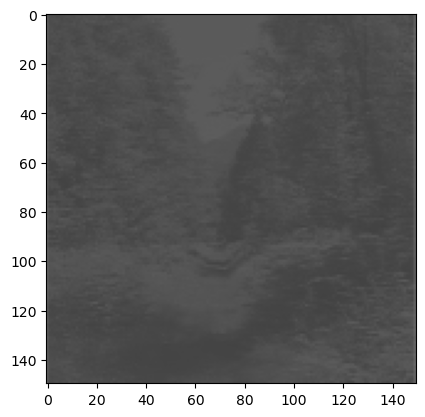

In [83]:
plt.imshow(pre_x)
plt.show()